In [1]:
#Neural Network Classification With TensorFlow

In [2]:
# Creating  Sample Data 

from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

In [3]:
X.shape

(1000, 2)

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [5]:
import pandas as pd

circles = pd.DataFrame({'X0' : X[:, 0], 'X1' : X[:, 1], 'label': y})

circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


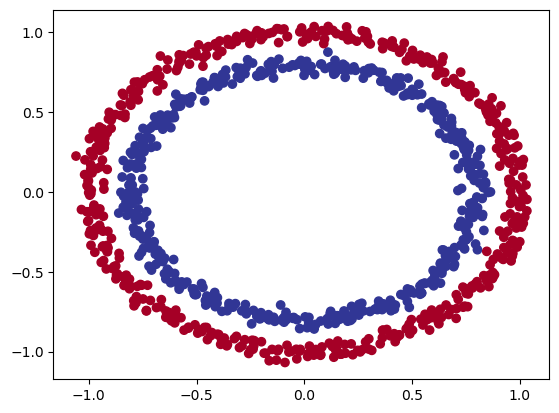

In [6]:
# Visualize

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [7]:
import tensorflow as tf

In [8]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer= tf.keras.optimizers.SGD(learning_rate=0.01), 
                metrics=['accuracy'])

In [9]:
model_1.fit(X, y, epochs=10)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4842 - loss: 6.3016 
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4931 - loss: 8.1701
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4971 - loss: 8.1051
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4936 - loss: 8.1622
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4994 - loss: 8.0680
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5009 - loss: 8.0445
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4968 - loss: 8.1099
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4913 - loss: 8.1989
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5323 - loss: 7.5387
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4726 - loss: 8.5002


In [10]:
# Train our model for longer 
model_1.fit(X, y, epochs=200, verbose=1) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4968 - loss: 8.1103
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5272 - loss: 7.6208
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4991 - loss: 8.0729
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4866 - loss: 8.2750
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4838 - loss: 8.3198
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4969 - loss: 8.1090
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5075 - loss: 7.9376
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5178 - loss: 7.7719
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5074 - loss: 7.9394
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4918 - loss: 8.1913
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5034 - loss: 8.0047
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy

[8.059046745300293, 0.5]

In [11]:
# Testing another model architecture

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=1) # set verbose=0 to make the output print less

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4501 - loss: 2.1709 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4822 - loss: 0.7004
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4575 - loss: 0.6976
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4494 - loss: 0.6976
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4470 - loss: 0.6977
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4470 - loss: 0.6977
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4471 - loss: 0.6977
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4497 - loss: 0.6977
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4497 - loss: 0.6977
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4497 - loss: 0.6977
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4497 - loss: 0.6977
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [12]:
# Evaluate the second model
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5103 - loss: 0.6923


[0.6943086385726929, 0.49300000071525574]

In [13]:
# Improving using a third Model by changing activation from linear to relu

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu'), # add 100 dense neurons
  tf.keras.layers.Dense(10, activation='relu'), # add another layer with 10 neurons
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5397 - loss: 0.6950
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5352 - loss: 0.6917
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5225 - loss: 0.6907
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5070 - loss: 0.6899
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5075 - loss: 0.6891
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5232 - loss: 0.6881
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5392 - loss: 0.6869
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5511 - loss: 0.6857
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5546 - loss: 0.6843
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5708 - loss: 0.6827
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5604 - loss: 0.6808
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [14]:
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0340


[0.03241792321205139, 1.0]

In [15]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


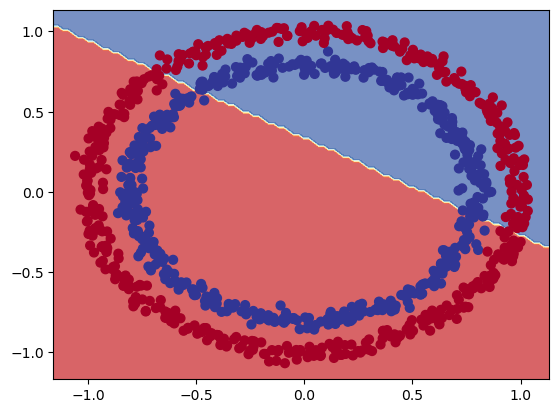

In [16]:
# Check out the predictions our model is making
plot_decision_boundary(model_2, X, y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


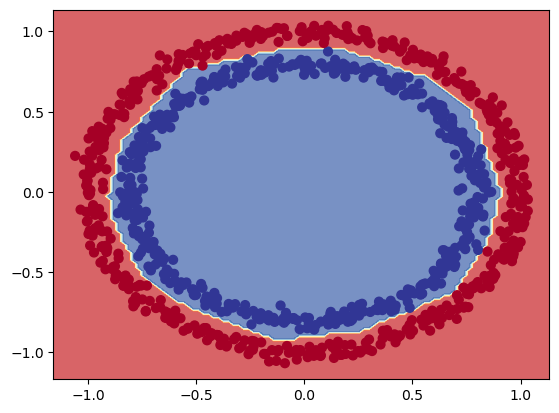

In [17]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [18]:
 #Investigating Activation Functions
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid

A = tf.cast(tf.range(-10, 10), tf.float32)
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

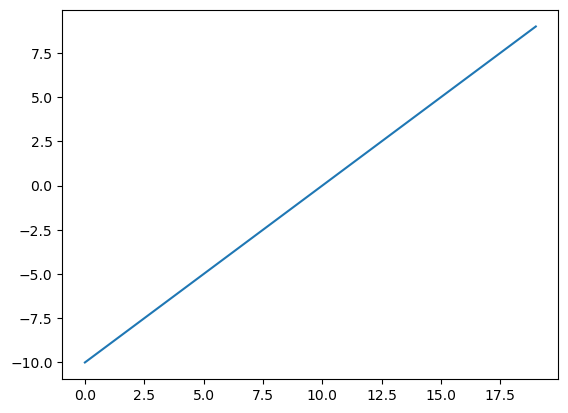

In [19]:
# Linear activation function for regression problem

plt.plot(A);

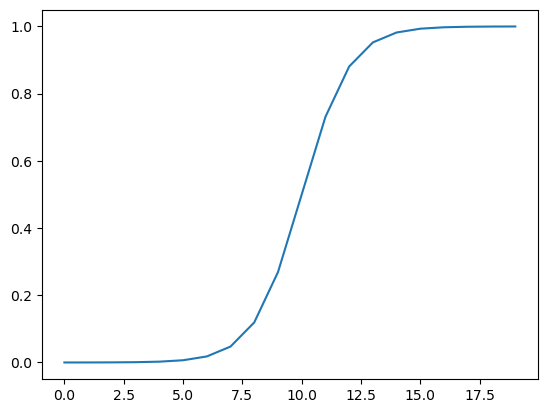

In [20]:
# Sigmoid activation for binary classification
plt.plot(sigmoid(A));

In [21]:
# Relu activation function for hidden layers

def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

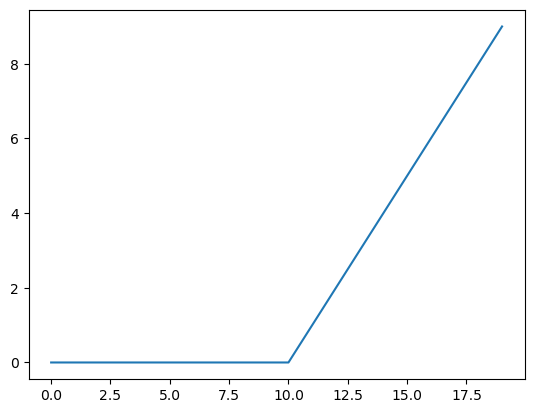

In [22]:
# Relu activation function for hidden layers

plt.plot(relu(A));

In [23]:
# Splitting the dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

X_train_2.shape, X_val.shape, y_val.shape, y_train_2.shape

((640, 2), (160, 2), (160,), (640,))

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

earlyStopping = EarlyStopping(monitor='val_loss', patience=5)
# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'],
                )

# Fit the model
history = model_4.fit(X_train_2, y_train_2, validation_data=(X_val, y_val), epochs=25, callbacks=[earlyStopping])

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.5381 - loss: 0.6987 - val_accuracy: 0.5250 - val_loss: 0.6919
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4886 - loss: 0.6991 - val_accuracy: 0.4750 - val_loss: 0.6962
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5078 - loss: 0.6948 - val_accuracy: 0.4750 - val_loss: 0.6936
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4471 - loss: 0.6953 - val_accuracy: 0.4750 - val_loss: 0.6944
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4606 - loss: 0.6950 - val_accuracy: 0.4750 - val_loss: 0.6941
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4606 - loss: 0.6951 - val_accuracy: 0.4750 - val_loss: 0.6942


In [25]:
# Evaluation of model

loss, accuracy = model_4.evaluate(X_test, y_test)

print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5093 - loss: 0.6930  
Model loss on the test set: 0.6933072805404663
Model accuracy on the test set: 50.00%


Text(0, 0.5, 'Accuracy and Loss')

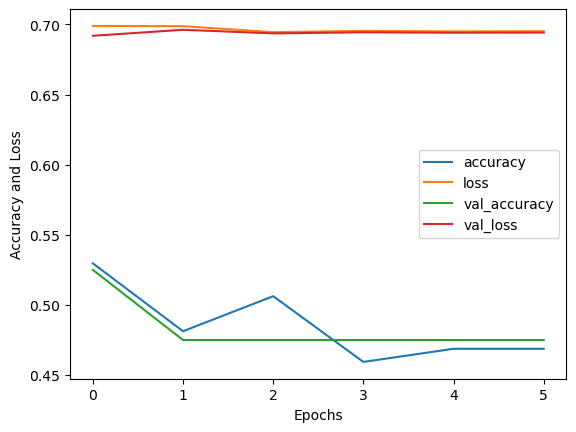

In [26]:
pd.DataFrame(history.history).plot()

plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
doing binary classifcation...


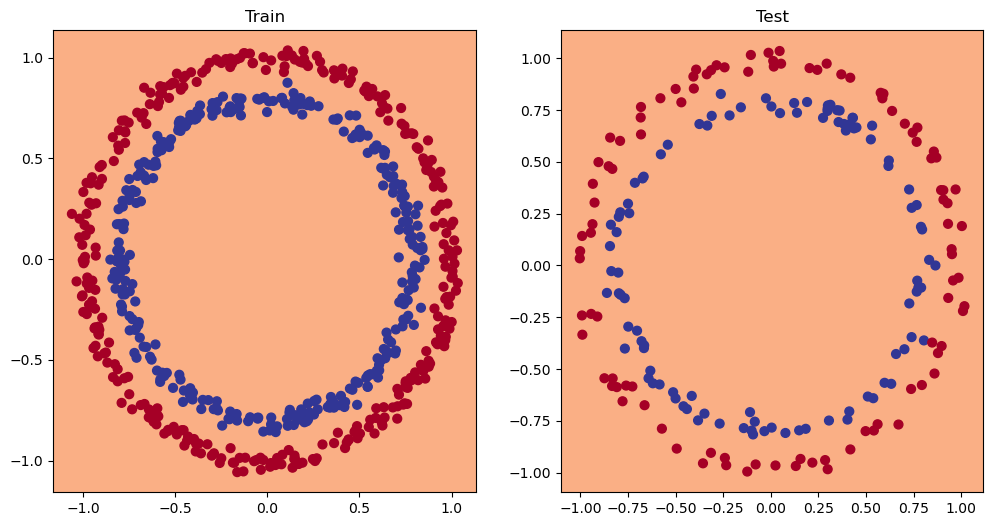

In [28]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X=X_train_2, y=y_train_2)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X=X_test, y=y_test)
plt.show()

In [29]:
# Finding the best learning rate

from tensorflow.keras.callbacks import EarlyStopping

# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

earlyStopping = EarlyStopping(monitor='val_loss', patience=50)
# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'],
                )
# Create a learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history = model_5.fit(X_train_2, y_train_2, validation_data=(X_val, y_val), 
                      epochs=25, callbacks=[earlyStopping, lr_scheduler])

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4370 - loss: 0.6957 - val_accuracy: 0.4812 - val_loss: 0.6963 - learning_rate: 1.0000e-04
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4936 - loss: 0.6956 - val_accuracy: 0.4812 - val_loss: 0.6962 - learning_rate: 1.1220e-04
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4910 - loss: 0.6955 - val_accuracy: 0.4875 - val_loss: 0.6961 - learning_rate: 1.2589e-04
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4901 - loss: 0.6955 - val_accuracy: 0.4875 - val_loss: 0.6960 - learning_rate: 1.4125e-04
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4888 - loss: 0.6954 - val_accuracy: 0.4875 - val_loss: 0.6959 - learning_rate: 1.5849e-04
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4931 - loss: 0.6953 - val_accuracy: 0.4875 - val_loss: 0.6958 - learning_rate: 1.7783e-04
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4881 - los

In [30]:
# Evaluation of model for model 5

loss, accuracy = model_5.evaluate(X_test, y_test)

print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4889 - loss: 0.6938  
Model loss on the test set: 0.6938096880912781
Model accuracy on the test set: 48.00%


Text(0, 0.5, 'Accuracy and Loss')

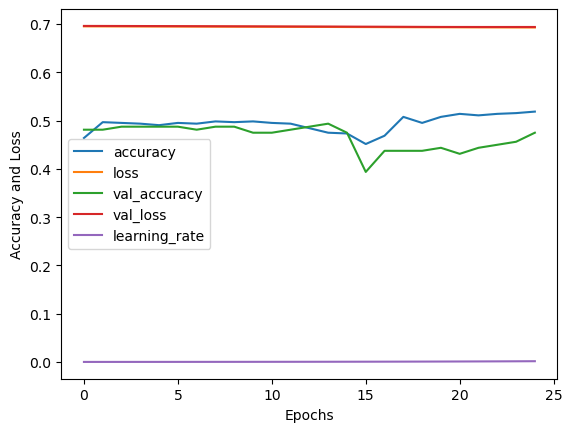

In [31]:
pd.DataFrame(history.history).plot()

plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
doing binary classifcation...


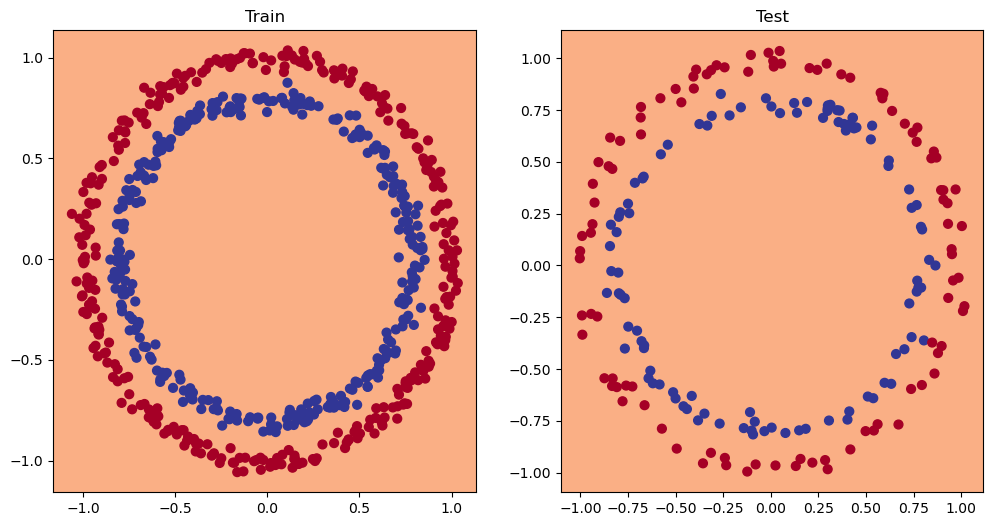

In [32]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X=X_train_2, y=y_train_2)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X=X_test, y=y_test)
plt.show()

In [33]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = tf.round(model_4.predict(X_test))

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[100,   0],
       [100,   0]], dtype=int64)

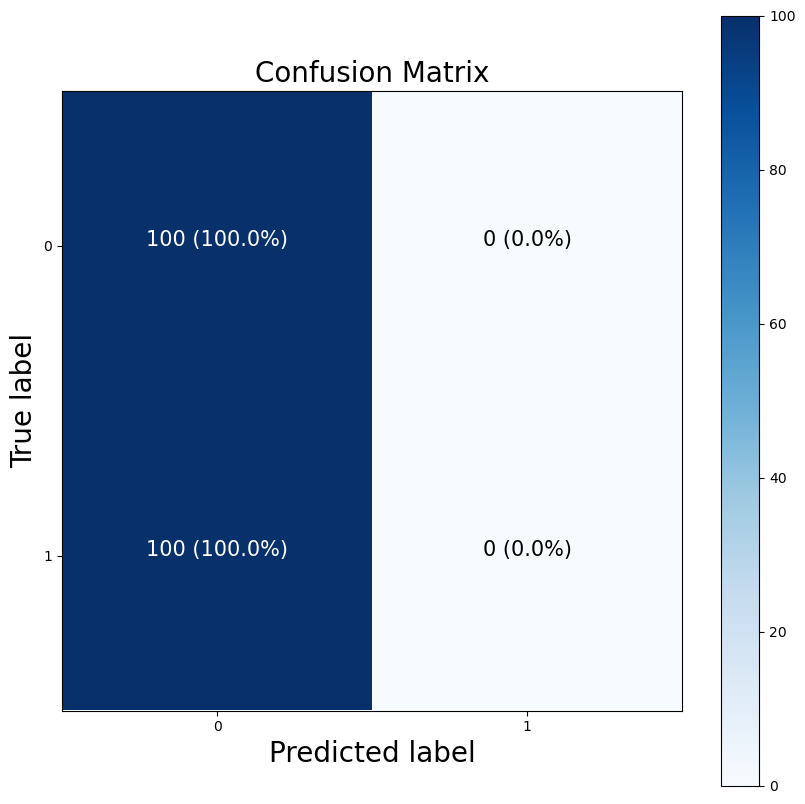

In [34]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [35]:
#Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


In [36]:
# Working with a Larger Dataset using the MNIST dataset for fashion

In [37]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [38]:
# View the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [39]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [40]:
train_data.shape[0]

60000

In [41]:
train_data[0].shape

(28, 28)

In [42]:
train_labels[0].shape

()

23395


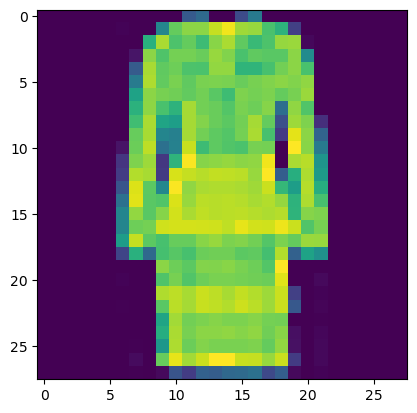

In [43]:
# Generate random index

random_indx = np.random.randint(low=0, high=train_data.shape[0])  # Returns a single integer
print(random_indx)

plt.imshow(train_data[random_indx])


In [44]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Our output shape
len(class_names)

10

[8261, 32751, 37844, 14252, 46339, 56401, 42360, 35869, 32150, 34908]


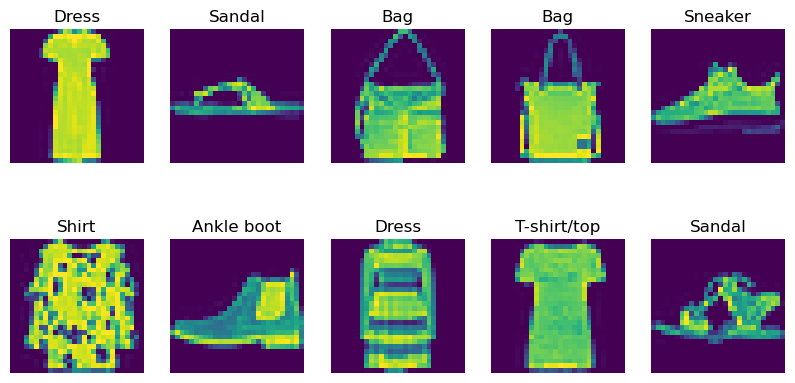

In [45]:
# Generating Random Indices

random_indices = list(np.random.randint(low=0, high=train_data.shape[0], size=10))  # Generate 10 random indices
print(random_indices)

plt.figure(figsize=(10, 5))  # Adjust size as needed

for i, img_idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
    plt.imshow(train_data[img_idx])  # Display the image
    plt.title(class_names[train_labels[img_idx]])
    plt.axis("off")  # Hide axes

plt.show()  # Show all images at once


[52495, 58328, 34931, 23304, 19811, 6374, 14727, 48446, 29576, 59588]


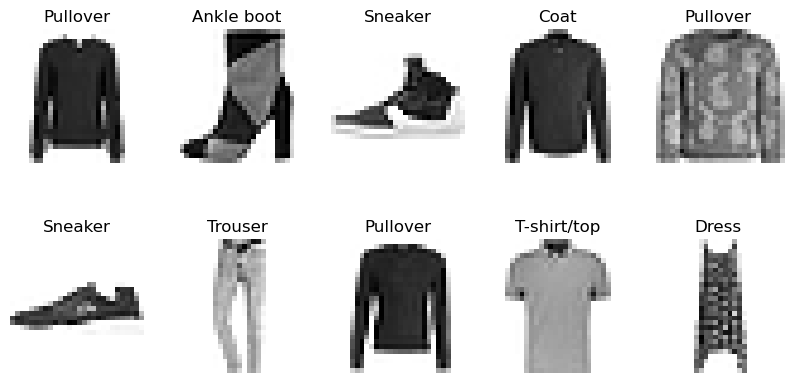

In [46]:
# Changing the colours into gray scale images

random_indices = list(np.random.randint(low=0, high=train_data.shape[0], size=10))  # Generate 10 random indices
print(random_indices)

plt.figure(figsize=(10, 5))  # Adjust size as needed

for i, img_idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
    plt.imshow(train_data[img_idx], cmap=plt.cm.binary)  # Display the image
    plt.title(class_names[train_labels[img_idx]])
    plt.axis("off")  # Hide axes

plt.show()  # Show all images at once


In [47]:
# Normalizing data
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

In [48]:
# Creating classification model

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(train_data.shape[1], train_data.shape[2])), 
    tf.keras.layers.Dense(10, activation='relu'), 
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["accuracy"])

# Fit the model
history = model_6.fit(train_data,
                                train_labels,
                                epochs=5,
                                validation_data=(test_data, test_labels))

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4003 - loss: 1.4644 - val_accuracy: 0.6424 - val_loss: 0.9186
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6256 - loss: 0.9234 - val_accuracy: 0.6624 - val_loss: 0.8546
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6457 - loss: 0.8656 - val_accuracy: 0.6780 - val_loss: 0.8314
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6593 - loss: 0.8434 - val_accuracy: 0.6796 - val_loss: 0.8241
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6669 - loss: 0.8313 - val_accuracy: 0.6854 - val_loss: 0.8154


In [49]:
model_6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,834 (93.11 KB)

 Trainable params: 7,944 (31.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,890 (62.07 KB)

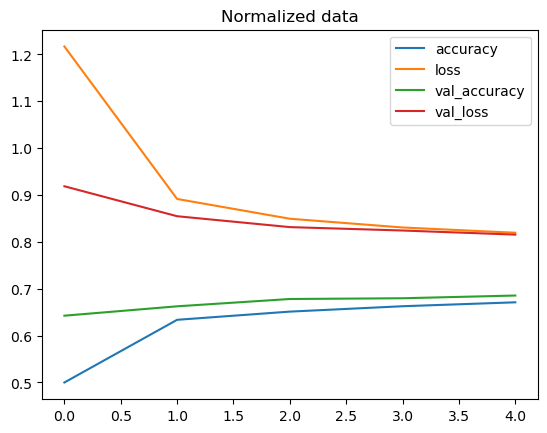

In [50]:
import pandas as pd

# Plot normalized data loss curves
pd.DataFrame(history.history).plot(title="Normalized data");

In [51]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_7.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2114 - loss: 1.9953 - val_accuracy: 0.3733 - val_loss: 1.4229 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5008 - loss: 1.2521 - val_accuracy: 0.6381 - val_loss: 0.9218 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6666 - loss: 0.8682 - val_accuracy: 0.7406 - val_loss: 0.7176 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.7693 - loss: 0.6732 - val_accuracy: 0.7744 - val_loss: 0.6348 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8001 - loss: 0.6011 - val_accuracy: 0.8069 - val_loss: 0.5928 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8123 - loss: 0.5665 - val_accuracy: 0.8112 - val_loss: 0.5707 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.819

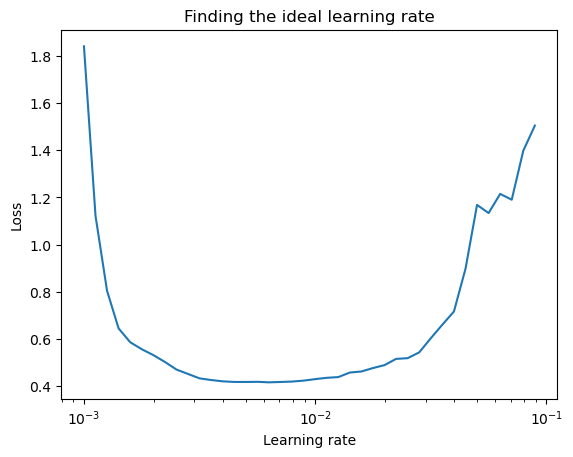

In [52]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [53]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["accuracy"])



# Fit the model
apply_ideal_lr_history = model_8.fit(train_data,
                               train_labels,
                               epochs=12, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.6416 - loss: 1.0264 - val_accuracy: 0.8148 - val_loss: 0.5537 - learning_rate: 0.0010
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8248 - loss: 0.5132 - val_accuracy: 0.8313 - val_loss: 0.4912 - learning_rate: 0.0011
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8405 - loss: 0.4583 - val_accuracy: 0.8357 - val_loss: 0.4687 - learning_rate: 0.0013
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8475 - loss: 0.4357 - val_accuracy: 0.8372 - val_loss: 0.4626 - learning_rate: 0.0014
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8509 - loss: 0.4233 - val_accuracy: 0.8417 - val_loss: 0.4494 - learning_rate: 0.0016
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8539 - loss: 0.4134 - val_accuracy: 0.8439 - val_loss: 0.4448 - learning_rate: 0.0018
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8563 -

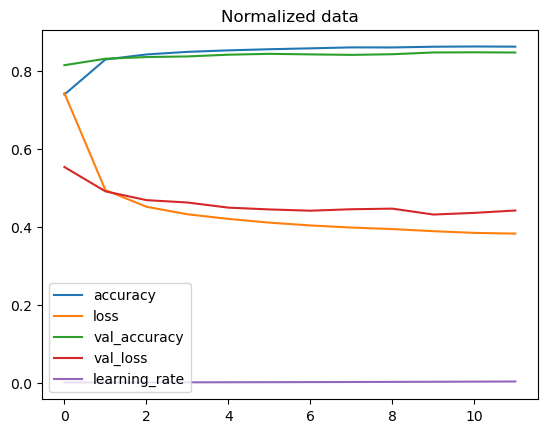

In [54]:
import pandas as pd

# Plot normalized data loss curves
pd.DataFrame(apply_ideal_lr_history.history).plot(title="Normalized data");

In [55]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [56]:
# Predictions with the most recent model
y_probs = model_8.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.21848198e-09, 4.58392525e-12, 8.33944525e-10, 4.82058738e-07,
        7.74032054e-12, 2.25657895e-02, 2.72900080e-09, 4.77214120e-02,
        3.19924256e-05, 9.29680228e-01],
       [1.26193554e-04, 5.30310310e-11, 9.66922283e-01, 5.02496332e-05,
        7.78887561e-03, 2.59775646e-07, 2.50678509e-02, 7.07722284e-11,
        4.42672390e-05, 1.86551965e-08],
       [2.29023171e-05, 9.99925852e-01, 3.54986514e-06, 2.26332959e-05,
        2.45769716e-05, 4.84999673e-15, 2.48270084e-07, 5.37910989e-25,
        1.94017360e-07, 9.28417720e-23],
       [6.57743522e-06, 9.87458467e-01, 4.00647104e-06, 1.25135435e-02,
        1.65038946e-05, 3.34367039e-12, 6.65982157e-07, 8.89663148e-19,
        2.10299760e-07, 2.52665587e-16],
       [2.69943774e-01, 1.11712128e-04, 8.23127925e-02, 6.35740068e-03,
        1.03780115e-02, 1.25435516e-04, 6.16237938e-01, 7.80132950e-07,
        1.45299425e-02, 2.21826895e-06]], dtype=float32)

In [57]:
y_preds = y_probs.argmax(axis=1)

y_preds

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [58]:
# Check out the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[737,   5,  18,  90,   6,   5, 122,   0,  17,   0],
       [  2, 957,   1,  31,   6,   0,   2,   0,   1,   0],
       [ 17,   3, 761,  19, 117,   2,  76,   0,   5,   0],
       [ 14,   2,  11, 895,  39,   0,  30,   0,   9,   0],
       [  0,   1, 103,  32, 789,   0,  67,   0,   8,   0],
       [  0,   0,   0,   0,   0, 927,   0,  25,   2,  46],
       [106,   3, 142,  65,  87,   1, 576,   0,  20,   0],
       [  0,   0,   0,   0,   0,  37,   0, 919,   0,  44],
       [  4,   1,   7,   6,   8,   6,   8,   6, 951,   3],
       [  0,   0,   0,   0,   0,   4,   1,  34,   0, 961]], dtype=int64)

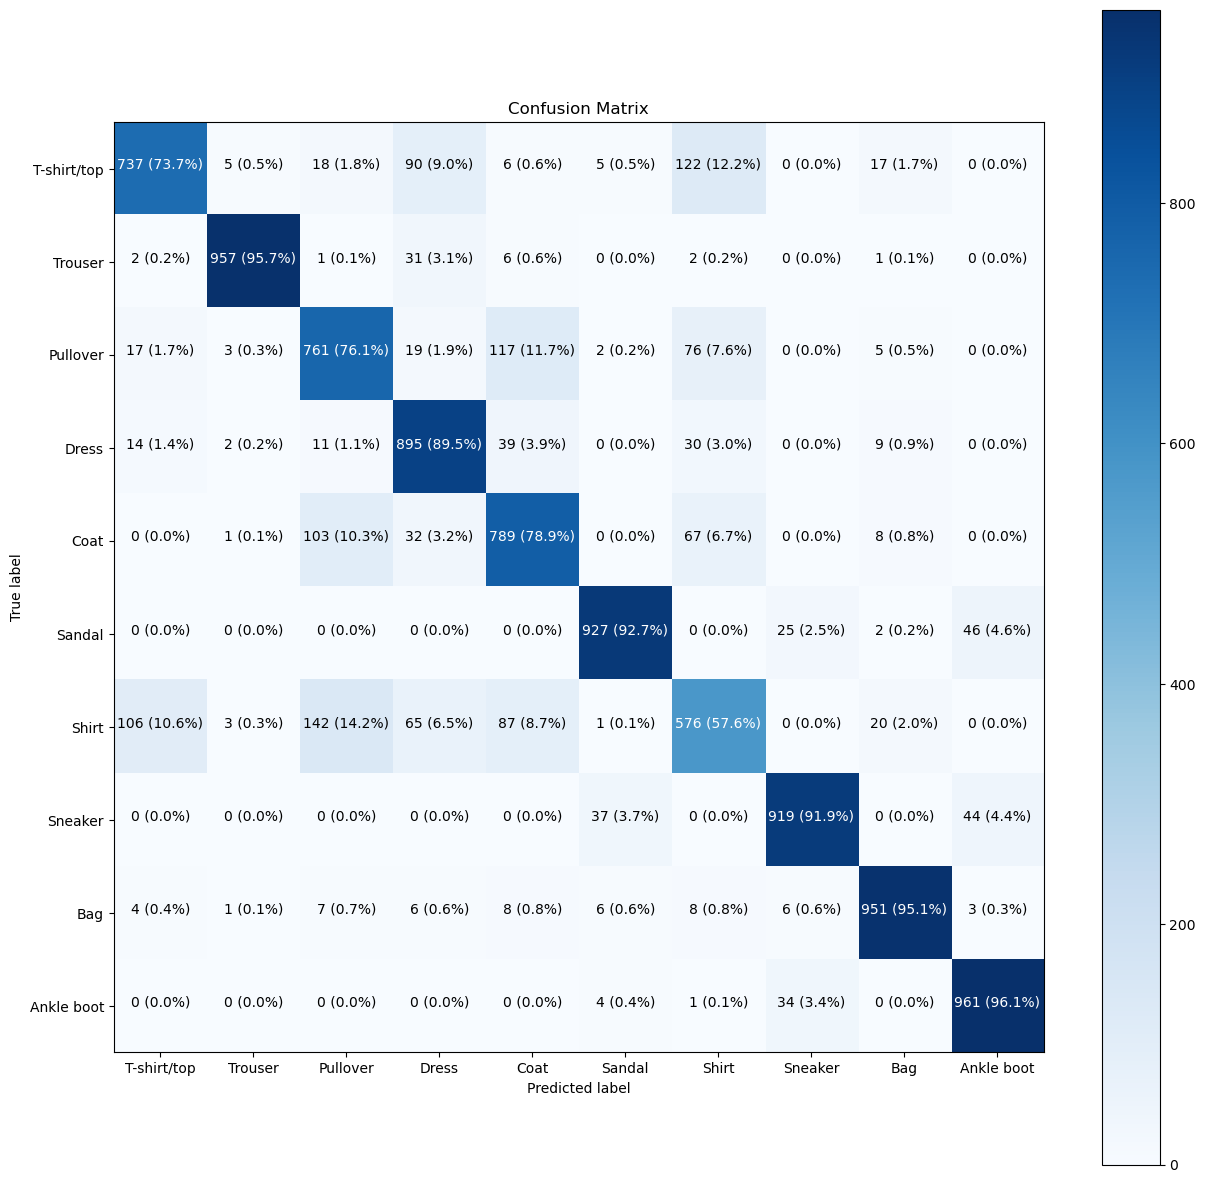

In [59]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [60]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "blue"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to blue or red.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


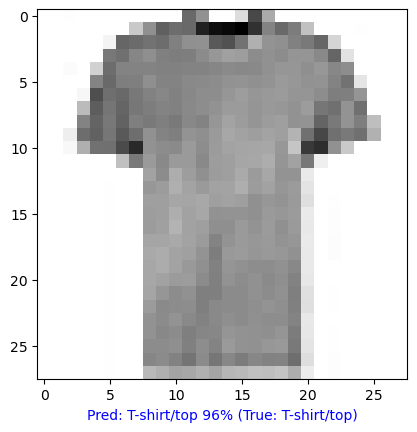

In [69]:
# Check out a random image as well as its prediction
plot_random_image(model=model_8,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [70]:
# Evaluation of model for model 5

loss, accuracy = model_8.evaluate(test_data, test_labels)

print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8482 - loss: 0.4336
Model loss on the test set: 0.44207191467285156
Model accuracy on the test set: 84.73%


In [71]:
model_8.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_18, built=True>,
 <Dense name=dense_19, built=True>,
 <Dense name=dense_20, built=True>]

In [72]:
weights, biases = model_8.layers[1].get_weights()

In [73]:
weights.shape, weights

((784, 10),
 array([[ 0.9091233 ,  0.22693093,  0.06902374, ..., -1.0335093 ,
          1.0239469 , -0.1417363 ],
        [ 0.22734676,  0.5204013 ,  0.5609409 , ...,  0.8214539 ,
         -0.36584473, -1.317332  ],
        [ 1.3423663 ,  1.3747019 , -0.15997595, ..., -1.7054639 ,
         -0.71788   , -0.672628  ],
        ...,
        [-0.6864824 ,  0.20634931, -0.03091083, ..., -0.15784262,
          0.1535824 ,  0.02093929],
        [ 0.220145  ,  0.29473677, -0.39349076, ...,  0.38227957,
         -0.12035095,  0.300218  ],
        [ 0.29759812,  1.1454142 , -0.60469484, ..., -0.49180967,
         -0.05691339, -0.61738986]], dtype=float32))

In [74]:
model_8.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,212 (94.58 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,142 (63.06 KB)